In [239]:
#Library for numerical comparisons
import numpy as np
import pandas as pd

#Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Machine-learning libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from scipy.stats import mode

import statistics as sd

#Doesn't displays warning messages
from warnings import simplefilter
simplefilter("ignore", category=FutureWarning)

In [2]:
#For replacing ? with null value while reding csv
missing=['?']
hd=pd.read_csv('Automobile price data _Raw_.csv',na_values=missing)
hd.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [3]:
#Provides datatypes along with column names and shape and non-null values present in each column
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    164 non-null float64
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         203 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 201 non-null float64
stroke               201 non-null float64
compression-ratio    205 non-null float64
horsepower           203 non-

### dropping normalized-losses column as it contains repeated values alongside 41 null values

In [4]:
hd.drop(['normalized-losses'],axis=1,inplace=True)
#Difficult to replace with mean or mode as straightway increases count of one particular value

### dropping null values of price column

In [5]:
hd['price'].unique()#To check whether it has any upsetting value

array([13495., 16500., 13950., 17450., 15250., 17710., 18920., 23875.,
          nan, 16430., 16925., 20970., 21105., 24565., 30760., 41315.,
       36880.,  5151.,  6295.,  6575.,  5572.,  6377.,  7957.,  6229.,
        6692.,  7609.,  8558.,  8921., 12964.,  6479.,  6855.,  5399.,
        6529.,  7129.,  7295.,  7895.,  9095.,  8845., 10295., 12945.,
       10345.,  6785., 11048., 32250., 35550., 36000.,  5195.,  6095.,
        6795.,  6695.,  7395., 10945., 11845., 13645., 15645.,  8495.,
       10595., 10245., 10795., 11245., 18280., 18344., 25552., 28248.,
       28176., 31600., 34184., 35056., 40960., 45400., 16503.,  5389.,
        6189.,  6669.,  7689.,  9959.,  8499., 12629., 14869., 14489.,
        6989.,  8189.,  9279.,  5499.,  7099.,  6649.,  6849.,  7349.,
        7299.,  7799.,  7499.,  7999.,  8249.,  8949.,  9549., 13499.,
       14399., 17199., 19699., 18399., 11900., 13200., 12440., 13860.,
       15580., 16900., 16695., 17075., 16630., 17950., 18150., 12764.,
      

In [6]:
hd.dropna(subset=['price'],inplace=True)
#Dropping price column as it's not good to replace important context with any value

In [7]:
len(hd)

201

#### symboling

In [9]:
hd['symboling'].unique()

array([ 3,  1,  2,  0, -1, -2], dtype=int64)

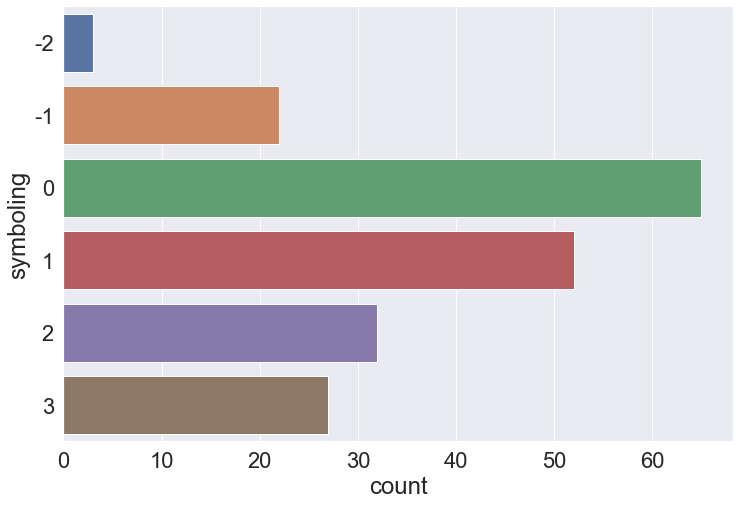

In [13]:
# Change seaborn plot size
fig = plt.gcf()
fig.set_size_inches(12, 8)

#Changing font-size
sns.set(font_scale=2)
sns.countplot(y=hd['symboling'])
#Checking count of which symbol to be preferred most

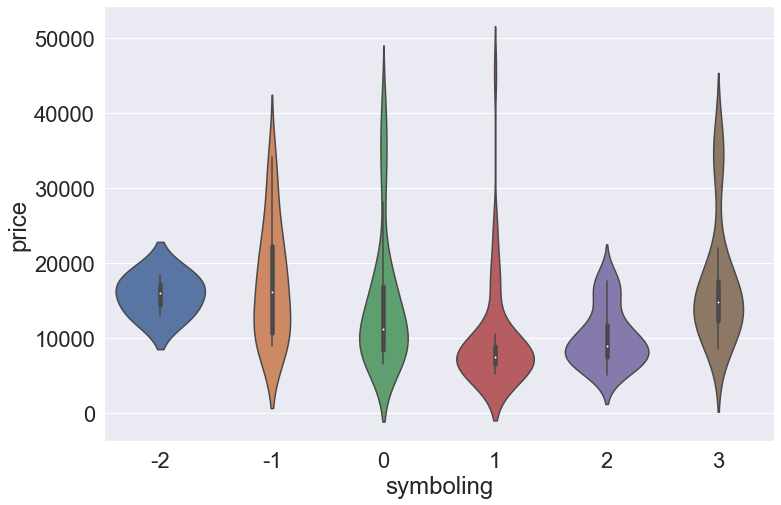

In [14]:
# Change seaborn plot size
fig = plt.gcf()
fig.set_size_inches(12, 8)

#Changing font-size
sns.set(font_scale=2)

#Comparing price with symboling as which symbol costs a fortune as a symbol of luxury
sns.violinplot(x=hd['symboling'],y=hd['price'])
#Clearly indicates on an average -2 and -1 has high priced symbols
#But for costly cars symbol 0 and 1 is preferred

In [15]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 25 columns):
symboling            201 non-null int64
make                 201 non-null object
fuel-type            201 non-null object
aspiration           201 non-null object
num-of-doors         199 non-null object
body-style           201 non-null object
drive-wheels         201 non-null object
engine-location      201 non-null object
wheel-base           201 non-null float64
length               201 non-null float64
width                201 non-null float64
height               201 non-null float64
curb-weight          201 non-null int64
engine-type          201 non-null object
num-of-cylinders     201 non-null object
engine-size          201 non-null int64
fuel-system          201 non-null object
bore                 197 non-null float64
stroke               197 non-null float64
compression-ratio    201 non-null float64
horsepower           199 non-null float64
peak-rpm             199 non-

#### make

In [16]:
hd['make'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [17]:
hd['make'].nunique()#using nunique to count number of columns

22

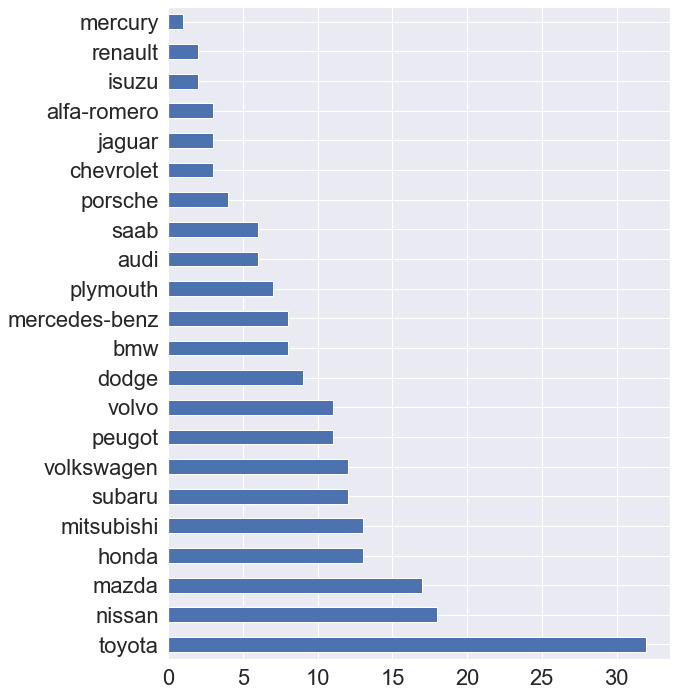

In [21]:
# Change seaborn plot size
fig = plt.gcf()
fig.set_size_inches(9, 12)

#Changing font-size
sns.set(font_scale=2)

hd['make'].value_counts().plot(kind='barh')

Text(0.5, 1.0, 'Jaquar and Mercedes-Benz ranges up high')

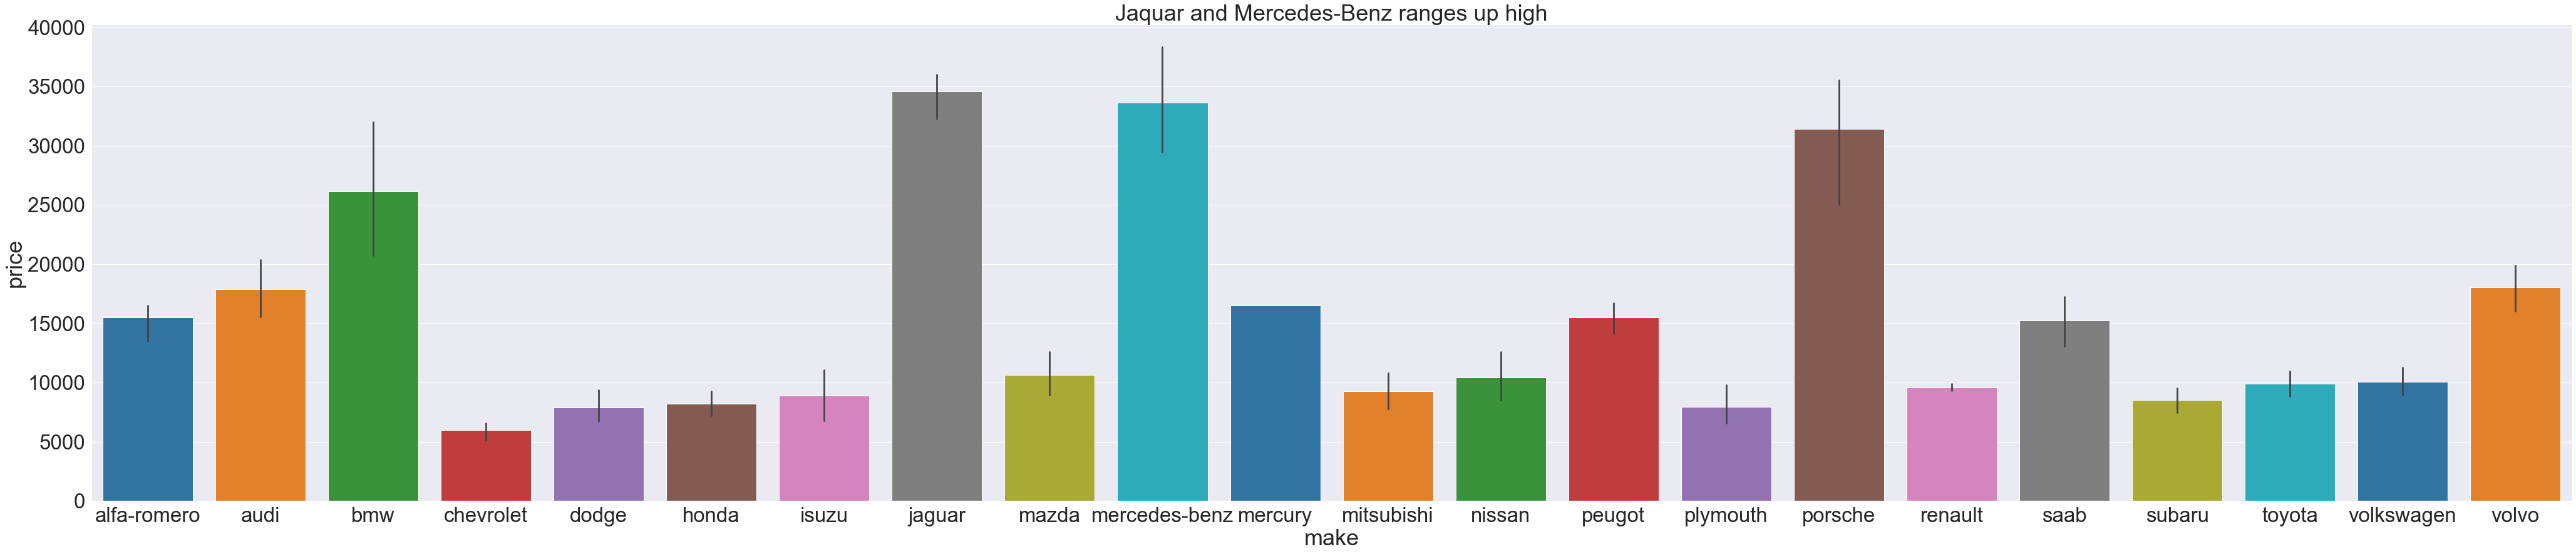

In [45]:
plt.rcParams['figure.figsize']=(71,14)
sns.set(font_scale=3)
axs = sns.barplot(x=hd['make'],y=hd['price'],palette='tab10')
plt.title("Jaquar and Mercedes-Benz ranges up high") 
#As clearly mentions the mean of the price of each brand ranges in this range

#### fuel-type

In [46]:
hd['fuel-type'].unique()

array(['gas', 'diesel'], dtype=object)

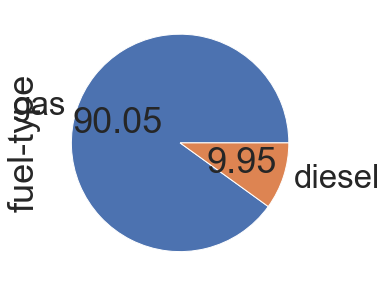

In [47]:
hd['fuel-type'].value_counts().plot.pie(figsize=(8,5),autopct='%.2f')

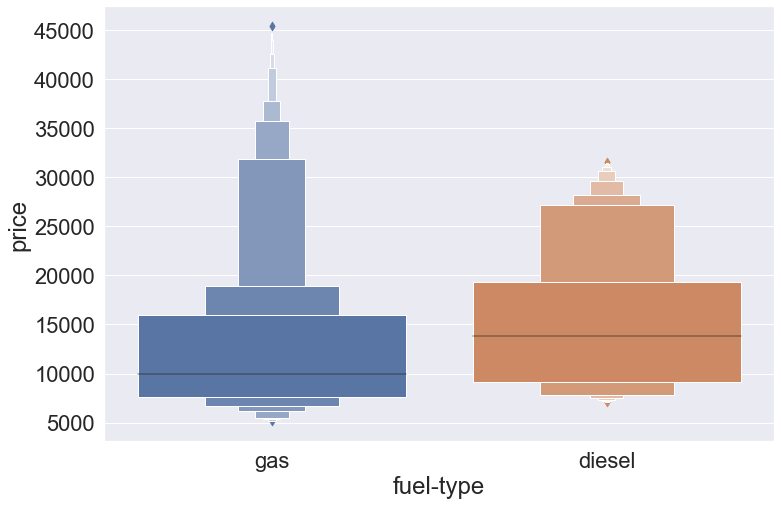

In [50]:
# Change seaborn plot size
fig = plt.gcf()
fig.set_size_inches(12, 8)

#Changing font-size
sns.set(font_scale=2)

sns.boxenplot(x=hd['fuel-type'],y=hd['price'])

In [261]:
# Change seaborn plot size
fig = plt.gcf()
fig.set_size_inches(12, 8)

#Changing font-size
sns.set(font_scale=2)

#comparing fuel-type with make to see vhich one is preferred most
hd.groupby(['make','fuel-type'])['fuel-type'].count()

make           fuel-type
alfa-romero    gas           3
audi           gas           6
bmw            gas           8
chevrolet      gas           3
dodge          gas           8
honda          gas          13
isuzu          gas           2
jaguar         gas           3
mazda          diesel        1
               gas          15
mercedes-benz  diesel        4
               gas           4
mercury        gas           1
mitsubishi     gas          13
nissan         diesel        1
               gas          17
peugot         diesel        5
               gas           6
plymouth       gas           7
porsche        gas           4
renault        gas           2
saab           gas           6
subaru         gas          12
toyota         diesel        3
               gas          29
volkswagen     diesel        4
               gas           8
volvo          diesel        1
               gas          10
Name: fuel-type, dtype: int64

<Figure size 864x576 with 0 Axes>

#### aspiration

In [59]:
hd['aspiration'].unique()

array(['std', 'turbo'], dtype=object)

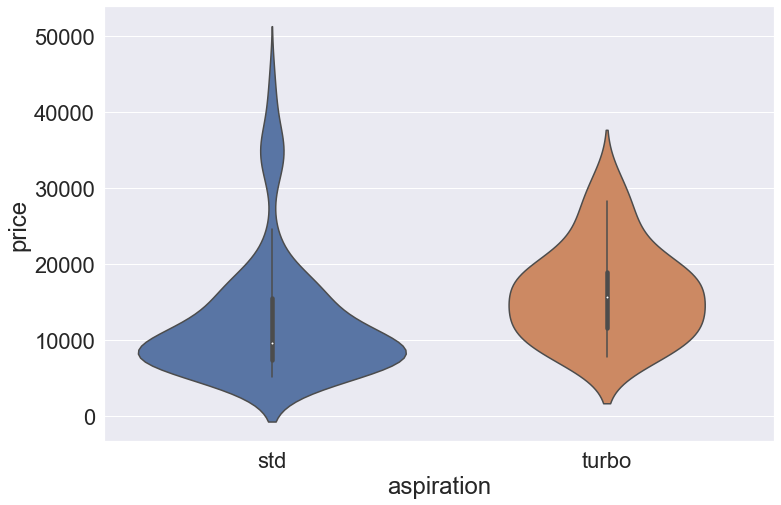

In [61]:
# Change seaborn plot size
fig = plt.gcf()
fig.set_size_inches(12, 8)

#Changing font-size
sns.set(font_scale=2)

sns.violinplot(x=hd['aspiration'],y=hd['price'])

In [195]:
# Change seaborn plot size
fig = plt.gcf()
fig.set_size_inches(16, 8)

#Changing font-size
sns.set(font_scale=2)

#Gives count of make alongside aspiration and fuel-type to classify which is preferred most
hd.groupby(['make','aspiration','fuel-type'])['fuel-type'].count()

make           aspiration  fuel-type
alfa-romero    std         gas           3
audi           std         gas           5
               turbo       gas           1
bmw            std         gas           8
chevrolet      std         gas           3
dodge          std         gas           6
               turbo       gas           2
honda          std         gas          13
isuzu          std         gas           2
jaguar         std         gas           3
mazda          std         diesel        1
                           gas          15
mercedes-benz  std         gas           4
               turbo       diesel        4
mercury        turbo       gas           1
mitsubishi     std         gas           7
               turbo       gas           6
nissan         std         diesel        1
                           gas          16
               turbo       gas           1
peugot         std         gas           5
               turbo       diesel        5
                 

<Figure size 1152x576 with 0 Axes>

In [65]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 25 columns):
symboling            201 non-null int64
make                 201 non-null object
fuel-type            201 non-null object
aspiration           201 non-null object
num-of-doors         199 non-null object
body-style           201 non-null object
drive-wheels         201 non-null object
engine-location      201 non-null object
wheel-base           201 non-null float64
length               201 non-null float64
width                201 non-null float64
height               201 non-null float64
curb-weight          201 non-null int64
engine-type          201 non-null object
num-of-cylinders     201 non-null object
engine-size          201 non-null int64
fuel-system          201 non-null object
bore                 197 non-null float64
stroke               197 non-null float64
compression-ratio    201 non-null float64
horsepower           199 non-null float64
peak-rpm             199 non-

#### num-of-doors

In [66]:
hd['num-of-doors'].unique()

array(['two', 'four', nan], dtype=object)

In [67]:
hd.dropna(subset=['num-of-doors'],inplace=True)

In [68]:
len(hd)

199

In [69]:
#Replacing as to get it's value in form of integer
hd['num-of-doors'].replace('two',2,inplace=True)
hd['num-of-doors'].replace('four',4,inplace=True)
hd['num-of-doors']=hd['num-of-doors'].astype('int64')

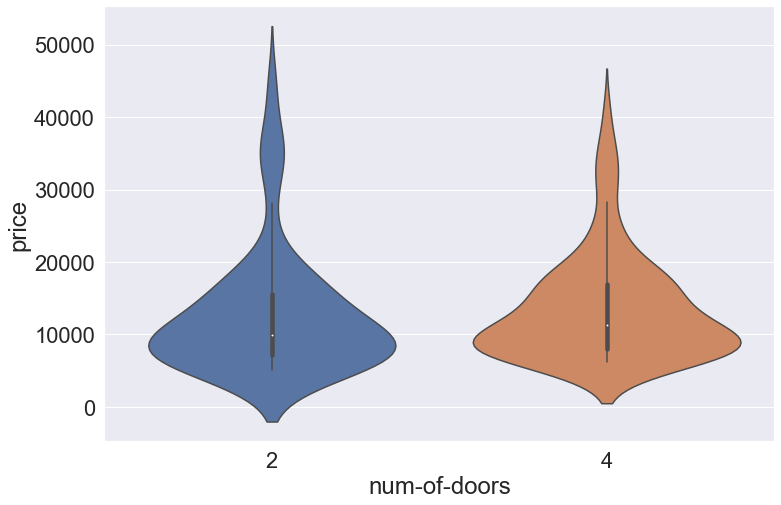

In [71]:
# Change seaborn plot size
fig = plt.gcf()
fig.set_size_inches(12, 8)

#Changing font-size
sns.set(font_scale=2)

sns.violinplot(data=hd,x="num-of-doors", y="price")
plt.savefig('doors.jpg')#For checking comparisons with box-plot as practice

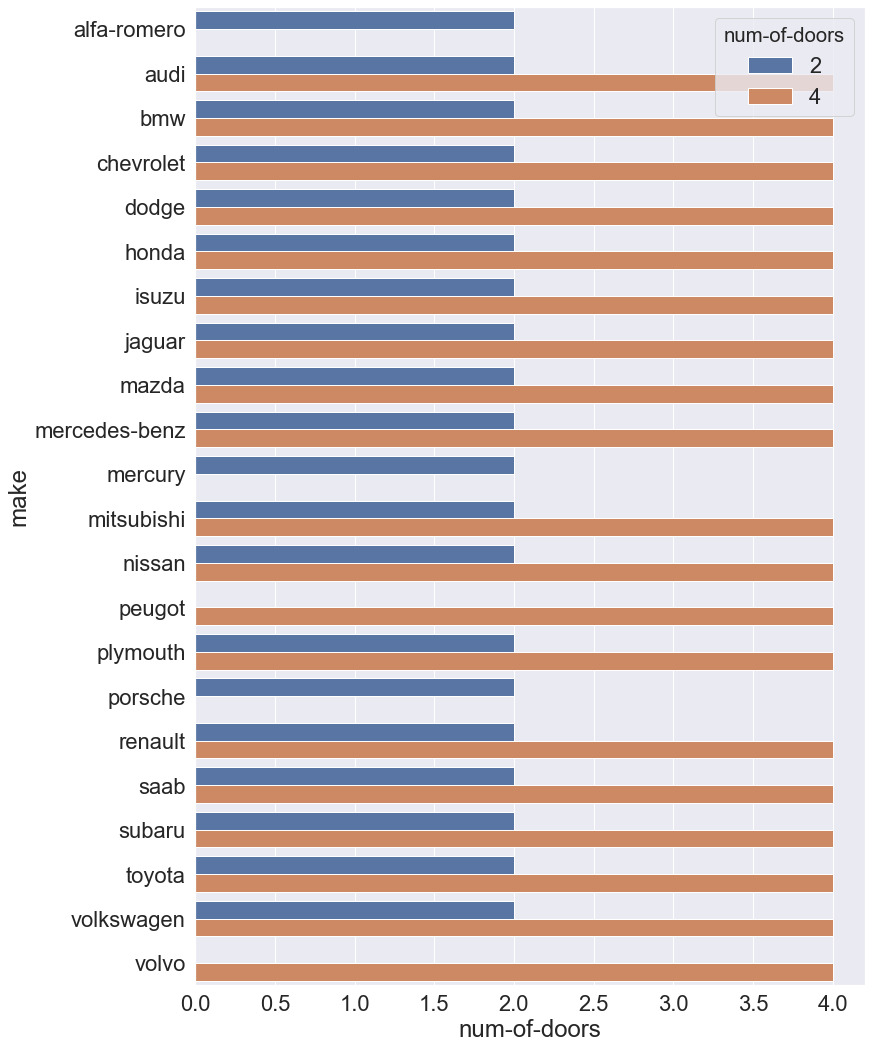

In [82]:
# Change seaborn plot size
fig = plt.gcf()
fig.set_size_inches(12, 18)

#Changing font-size
sns.set(font_scale=2)

#Getting comparison alongside make to check which company provides which standard of car
sns.barplot(y=hd['make'],x=hd['num-of-doors'],hue=hd['num-of-doors'])

#### body-style

In [83]:
hd['body-style'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

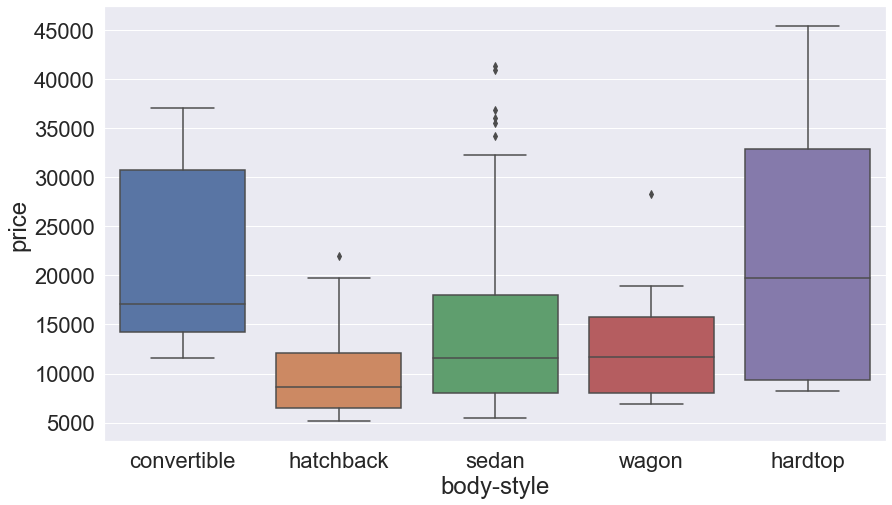

In [87]:
# Change seaborn plot size
fig = plt.gcf()
fig.set_size_inches(14, 8)

#Changing font-size
sns.set(font_scale=2)

sns.boxplot(x='body-style',y='price',data=hd)

#### drive-wheels

In [88]:
hd['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

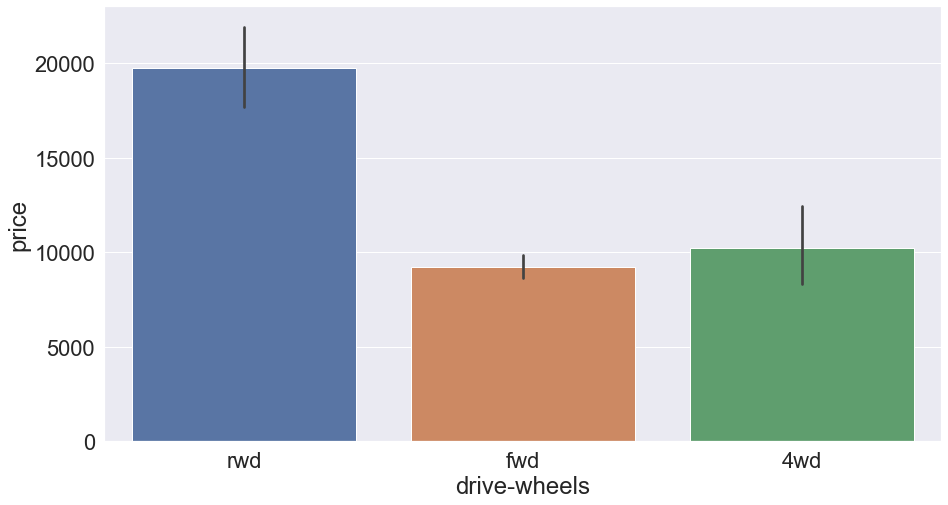

In [93]:
# Change seaborn plot size
fig = plt.gcf()
fig.set_size_inches(15, 8)

#Changing font-size
sns.set(font_scale=2)

sns.barplot(x=hd['drive-wheels'],y=hd['price'])

In [194]:
# Change seaborn plot size
fig = plt.gcf()
fig.set_size_inches(16, 8)

#Changing font-size
sns.set(font_scale=2)

#Checking which company sells out most of and which kind of cylinder
hd.groupby(['make','drive-wheels'])['drive-wheels'].count()

make           drive-wheels
alfa-romero    rwd              3
audi           4wd              1
               fwd              5
bmw            rwd              8
chevrolet      fwd              3
dodge          fwd              8
honda          fwd             13
isuzu          rwd              2
jaguar         rwd              3
mazda          fwd             10
               rwd              6
mercedes-benz  rwd              8
mercury        rwd              1
mitsubishi     fwd             13
nissan         fwd             15
               rwd              3
peugot         rwd             11
plymouth       fwd              6
               rwd              1
porsche        rwd              4
renault        fwd              2
saab           fwd              6
subaru         4wd              5
               fwd              7
toyota         4wd              2
               fwd             16
               rwd             14
volkswagen     fwd             12
volvo          rwd  

<Figure size 1152x576 with 0 Axes>

#### engine-location

In [102]:
hd['engine-location'].unique()

array(['front', 'rear'], dtype=object)

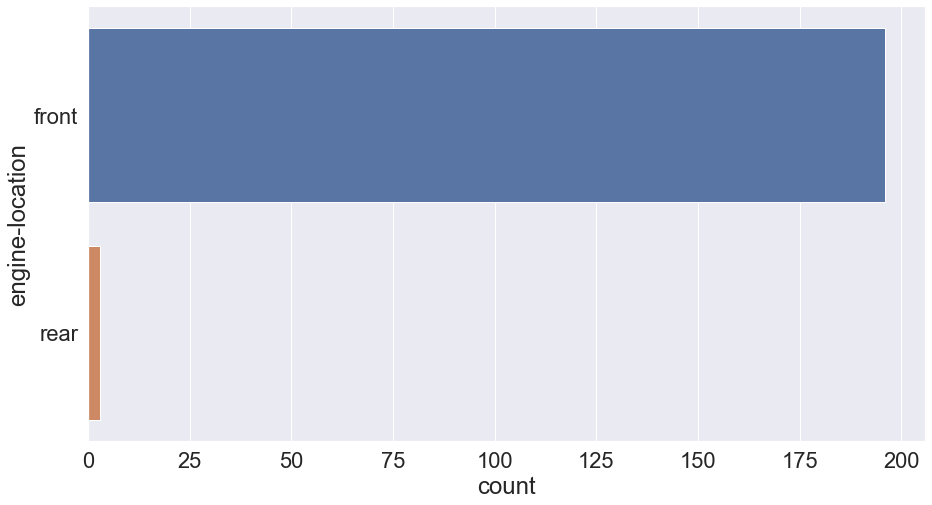

In [124]:
# Change seaborn plot size
fig = plt.gcf()
fig.set_size_inches(15, 8)

#Changing font-size
sns.set(font_scale=2)

#Comparing wheel-base with price
sns.countplot(y=hd['engine-location'])

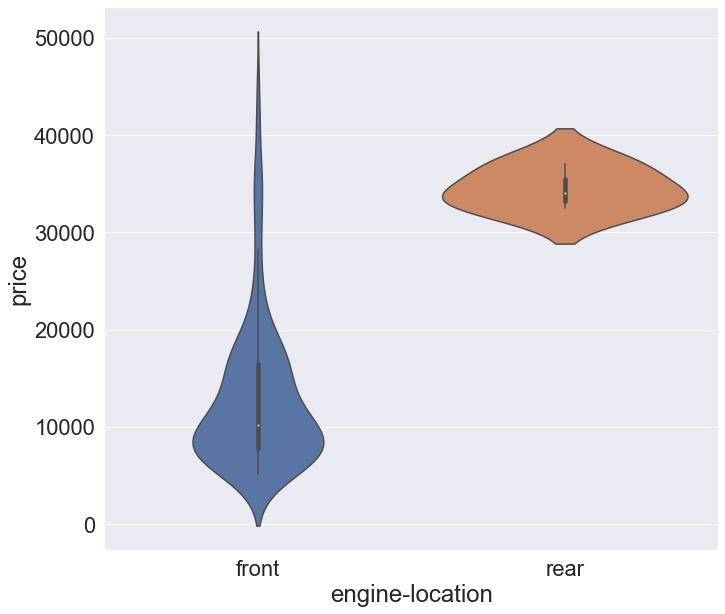

In [125]:
# Change seaborn plot size
fig = plt.gcf()
fig.set_size_inches(11, 10)

#Changing font-size
sns.set(font_scale=2)

#Comparing engine-location with price as we can see less values of rear ranges in fixed range but range of rear varies
#at higher prices only for less quantity
sns.violinplot(x=hd['engine-location'],y=hd['price'])

#### wheel-base

In [126]:
hd['wheel-base'].unique()

array([ 88.6,  94.5,  99.8,  99.4, 105.8, 101.2, 103.5, 110. ,  88.4,
        93.7, 103.3,  95.9,  86.6,  96.5,  94.3,  96. , 113. , 102. ,
        93.1,  95.3,  98.8, 104.9, 106.7, 115.6,  96.6, 120.9, 112. ,
       102.7,  93. ,  96.3,  95.1,  97.2, 100.4,  91.3,  99.2, 107.9,
       114.2, 108. ,  89.5,  96.1,  99.1,  93.3,  97. ,  96.9,  95.7,
        98.4, 102.4, 102.9, 104.5,  97.3, 104.3, 109.1])

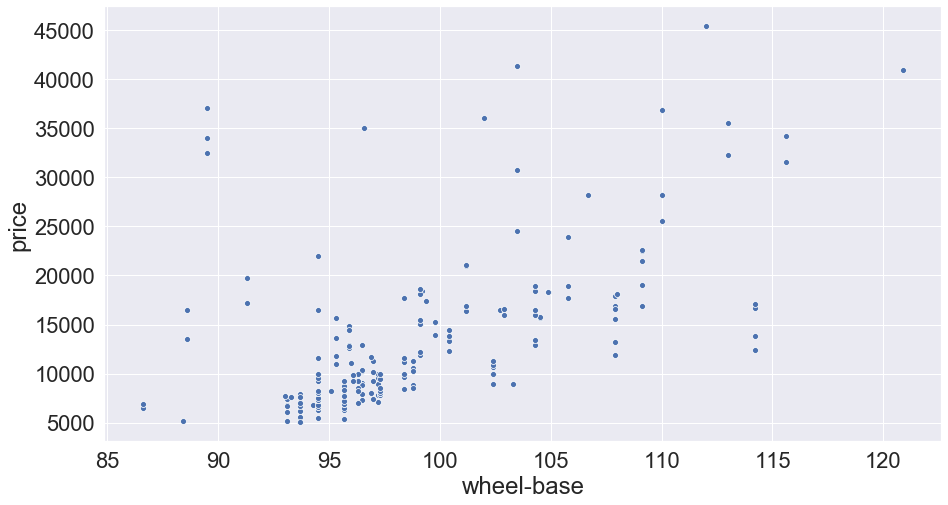

In [128]:
# Change seaborn plot size
fig = plt.gcf()
fig.set_size_inches(15, 8)

#Changing font-size
sns.set(font_scale=2)

#Comparing wheel-base with price as the size of wheel-base increases it's price increases
sns.scatterplot(x=hd['wheel-base'], y=hd['price'])

#### length

In [129]:
hd['length'].unique()

array([168.8, 171.2, 176.6, 177.3, 192.7, 176.8, 189. , 193.8, 197. ,
       141.1, 155.9, 158.8, 157.3, 174.6, 173.2, 144.6, 150. , 163.4,
       157.1, 167.5, 175.4, 169.1, 170.7, 172.6, 199.6, 191.7, 159.1,
       166.8, 169. , 177.8, 175. , 190.9, 187.5, 202.6, 180.3, 208.1,
       199.2, 178.4, 173. , 172.4, 165.3, 170.2, 165.6, 162.4, 173.4,
       181.7, 184.6, 178.5, 186.7, 198.9, 167.3, 168.9, 181.5, 186.6,
       156.9, 157.9, 172. , 173.5, 173.6, 158.7, 169.7, 166.3, 168.7,
       176.2, 175.6, 183.5, 187.8, 171.7, 159.3, 165.7, 180.2, 183.1,
       188.8])

<Figure size 1296x720 with 0 Axes>

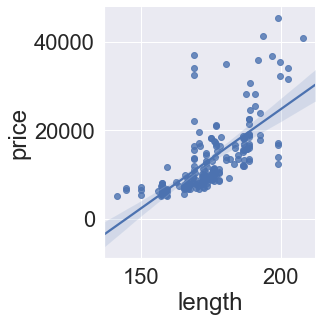

In [131]:
# Change seaborn plot size
fig = plt.gcf()
fig.set_size_inches(18, 10)

#Changing font-size
sns.set(font_scale=2)

#Comparing length with price which is almost directly proportional because after crossing 200 price decreases might be due to
#less prefrred by customers
sns.lmplot(x='length',y='price',data=hd)

#### width

In [132]:
hd['width'].unique()

array([64.1, 65.5, 66.2, 66.4, 66.3, 71.4, 64.8, 66.9, 67.9, 70.9, 60.3,
       63.6, 63.8, 64.6, 63.9, 64. , 65.2, 62.5, 66. , 61.8, 69.6, 70.6,
       64.2, 65.7, 66.5, 66.1, 70.3, 71.7, 70.5, 72. , 68. , 64.4, 65.4,
       68.4, 68.3, 65. , 66.6, 63.4, 65.6, 67.7, 67.2, 68.9, 68.8])

<Figure size 1296x864 with 0 Axes>

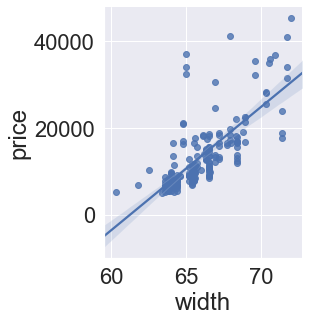

In [134]:
# Change seaborn plot size
fig = plt.gcf()
fig.set_size_inches(18, 12)

#Changing font-size
sns.set(font_scale=2)

#Comparing width with price it remains directly proportional and has no decrease later on
sns.lmplot(x='width',y='price',data=hd)

#### height

In [135]:
hd['height'].unique()

array([48.8, 52.4, 54.3, 53.1, 55.7, 55.9, 53.7, 56.3, 53.2, 52. , 50.8,
       50.6, 59.8, 50.2, 52.6, 54.5, 58.3, 53.3, 54.1, 51. , 53.5, 51.4,
       52.8, 47.8, 49.6, 55.5, 54.4, 56.5, 58.7, 54.9, 56.7, 55.4, 54.8,
       49.4, 51.6, 54.7, 55.1, 56.1, 49.7, 56. , 55.2, 50.5, 52.5, 53. ,
       59.1, 53.9, 55.6, 56.2, 57.5])

<Figure size 1296x864 with 0 Axes>

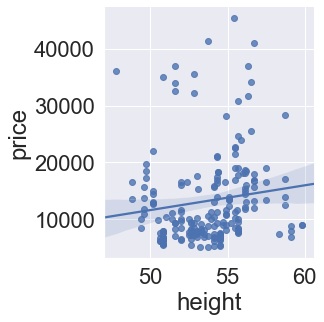

In [136]:
# Change seaborn plot size
fig = plt.gcf()
fig.set_size_inches(18, 12)

#Changing font-size
sns.set(font_scale=2)

#Comparing height with price as most of it ranges in range of 10k-20k
sns.lmplot(x='height',y='price',data=hd)

#### curb-weight

In [137]:
hd['curb-weight'].unique()

array([2548, 2823, 2337, 2824, 2507, 2844, 2954, 3086, 2395, 2710, 2765,
       3055, 3230, 3380, 3505, 1488, 1874, 1909, 1876, 2128, 1967, 1989,
       2535, 2811, 1713, 1819, 1837, 1940, 1956, 2010, 2024, 2236, 2289,
       2304, 2372, 2465, 2293, 2734, 4066, 3950, 1890, 1900, 1905, 1945,
       1950, 2380, 2385, 2500, 2410, 2425, 2670, 2700, 3515, 3750, 3495,
       3770, 3740, 3685, 3900, 3715, 2910, 1918, 1944, 2004, 2145, 2370,
       2328, 2833, 2921, 2926, 2365, 2405, 2403, 1889, 2017, 1938, 1951,
       2028, 1971, 2037, 2008, 2324, 2302, 3095, 3296, 3060, 3071, 3139,
       3020, 3197, 3430, 3075, 3252, 3285, 3485, 3130, 2191, 2818, 2778,
       2756, 2800, 2579, 2460, 2658, 2695, 2707, 2758, 2808, 2847, 2050,
       2120, 2240, 2190, 2340, 2510, 2290, 2455, 2420, 2650, 1985, 2040,
       2015, 2280, 3110, 2081, 2109, 2275, 2094, 2122, 2140, 2169, 2204,
       2265, 2300, 2540, 2536, 2551, 2679, 2714, 2975, 2326, 2480, 2414,
       2458, 2976, 3016, 3131, 3151, 2261, 2209, 22

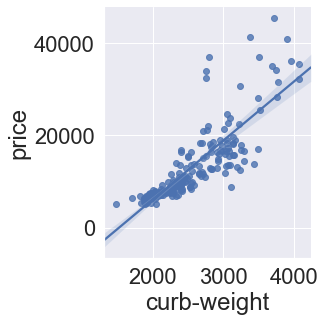

In [139]:
#drcreases price as curb weight surpasses 3.7k and mostply preffered by people ranging in 2to 3k
sns.lmplot(x='curb-weight',y='price',data=hd)

In [142]:
#Gives count of make alongside aspiration and fuel-type to classify which is preferred most
t=hd.groupby(['make','length','width','height','curb-weight'])['height'].count()
t

make         length  width  height  curb-weight
alfa-romero  168.8   64.1   48.8    2548           2
             171.2   65.5   52.4    2823           1
audi         176.6   66.2   54.3    2337           1
                     66.4   54.3    2824           1
             177.3   66.3   53.1    2507           1
                                                  ..
volvo        188.8   68.8   55.5    3049           1
                     68.9   55.5    2952           1
                                    3012           1
                                    3062           1
                                    3217           1
Name: height, Length: 187, dtype: int64

In [145]:
t[t.max()]# so alfa-romerro has only one type of length width and height but other ranges preferred by customers are wished
#wisely

1

#### engine-type

In [146]:
hd['engine-type'].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf'], dtype=object)

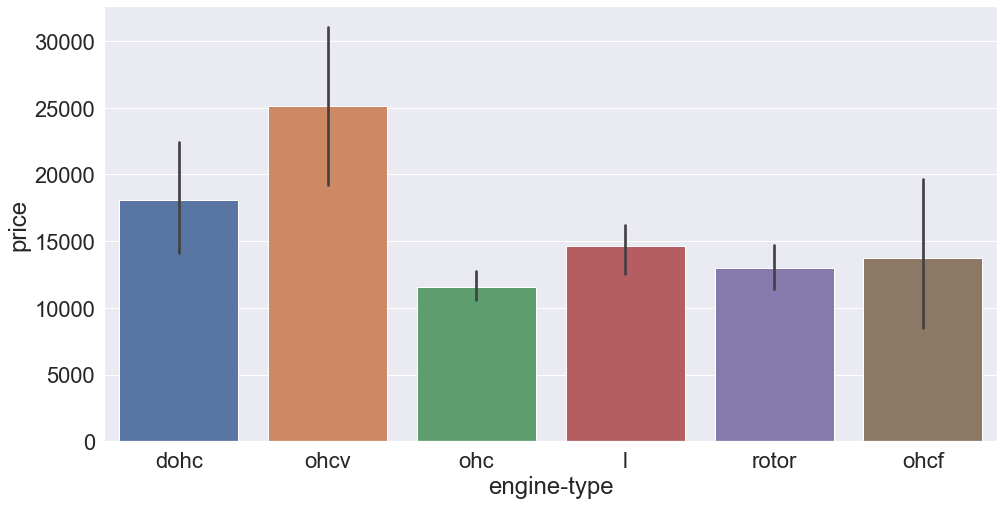

In [152]:
# Change seaborn plot size
fig = plt.gcf()
fig.set_size_inches(16,8)

#Changing font-size
sns.set(font_scale=2)

#Clearly mentions ohcv has higher price range but ohc and rotor costs less
sns.barplot(x=hd['engine-type'],y=hd['price'])

#### num-of-cylinders

In [153]:
hd['num-of-cylinders'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

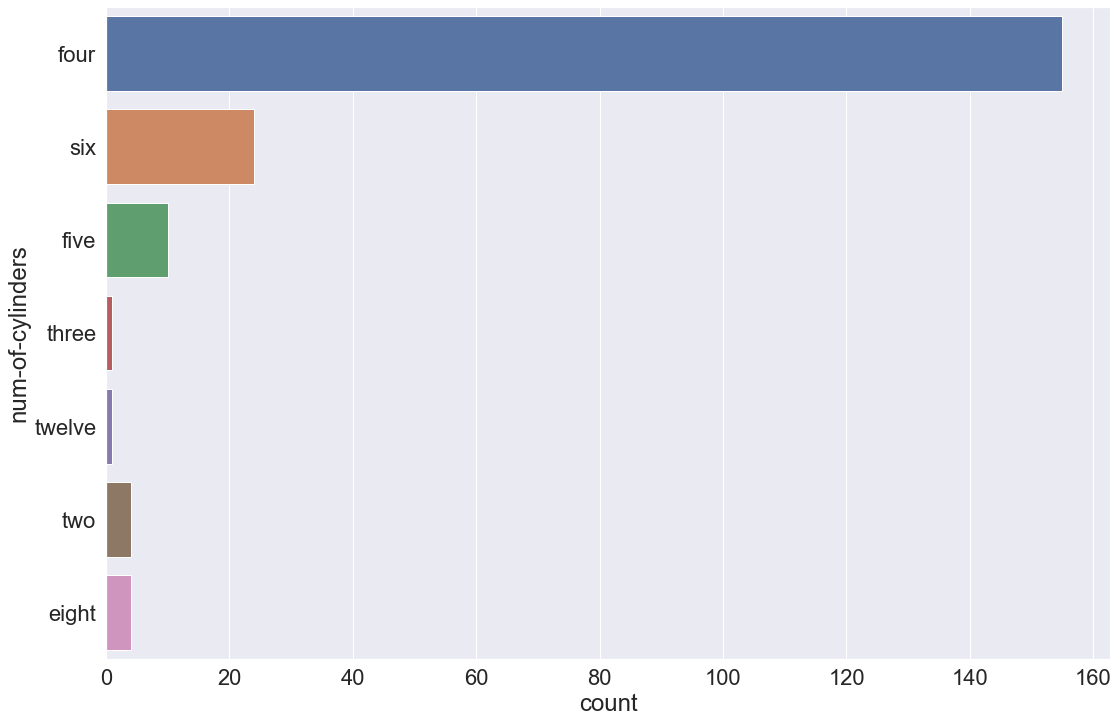

In [154]:
# Change seaborn plot size
fig = plt.gcf()
fig.set_size_inches(18, 12)

#Changing font-size
sns.set(font_scale=2)

#Comparing height with price as most of it ranges in range of 10k-20k
sns.countplot(y=hd['num-of-cylinders'])

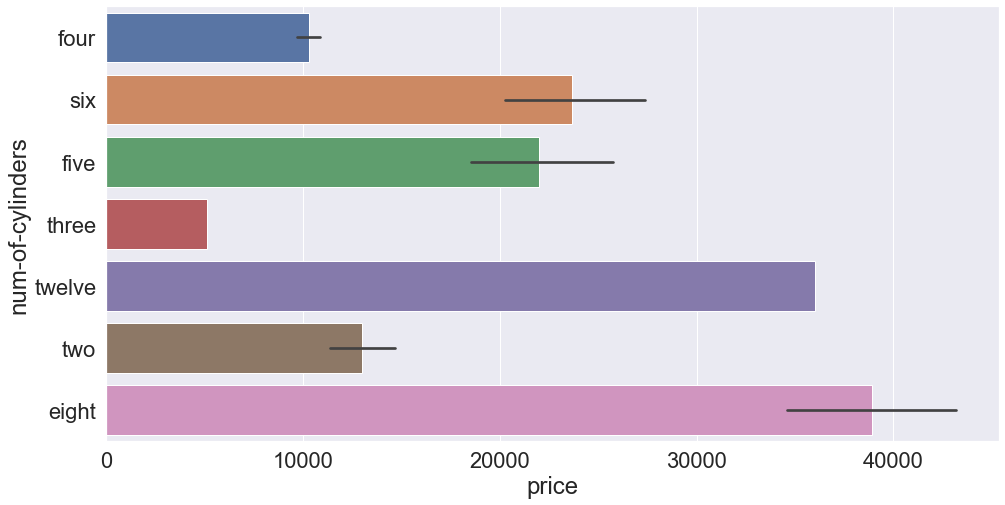

In [156]:
# Change seaborn plot size
fig = plt.gcf()
fig.set_size_inches(16, 8)

#Changing font-size
sns.set(font_scale=2)

#Eight cylinders are preffered most
sns.barplot(y=hd['num-of-cylinders'],x=hd['price'])

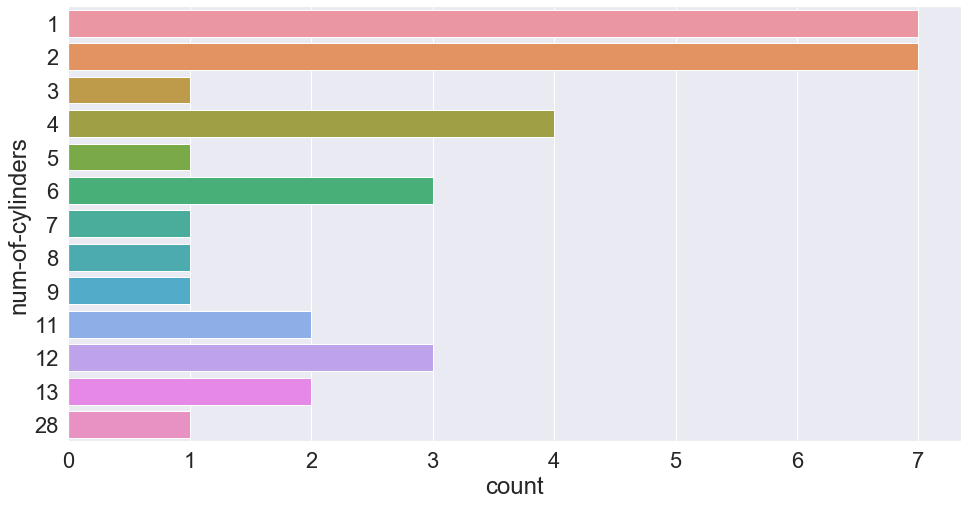

In [166]:
# Change seaborn plot size
fig = plt.gcf()
fig.set_size_inches(16, 8)

#Changing font-size
sns.set(font_scale=2)

#Checking which company sells out most of and which kind of cylinder
sns.countplot(y=hd.groupby(['make','num-of-cylinders'])['num-of-cylinders'].count())

#### engine-size

In [161]:
hd['engine-size'].unique()

array([130, 152, 109, 136, 131, 108, 164, 209,  61,  90,  98, 122, 156,
        92,  79, 110, 111, 119, 258, 326,  91,  70,  80, 140, 134, 183,
       234, 308, 304,  97, 103, 120, 181, 151, 194, 132, 121, 146, 171,
       161, 141, 173, 145], dtype=int64)

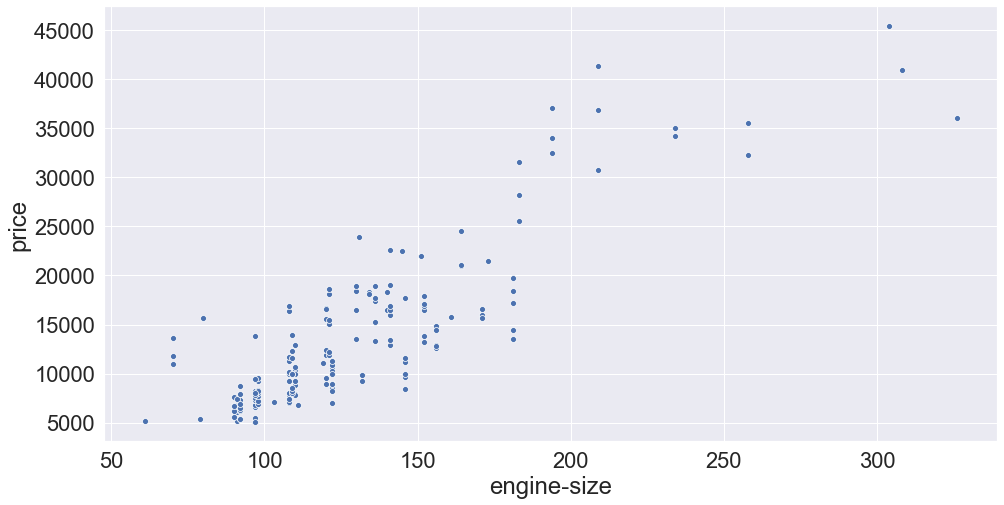

In [162]:
# Change seaborn plot size
fig = plt.gcf()
fig.set_size_inches(16, 8)

#Changing font-size
sns.set(font_scale=2)

#engine-size has higher price with size more than 300
sns.scatterplot(x=hd['engine-size'],y=hd['price'])

#### fuel-system

In [163]:
hd['fuel-system'].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

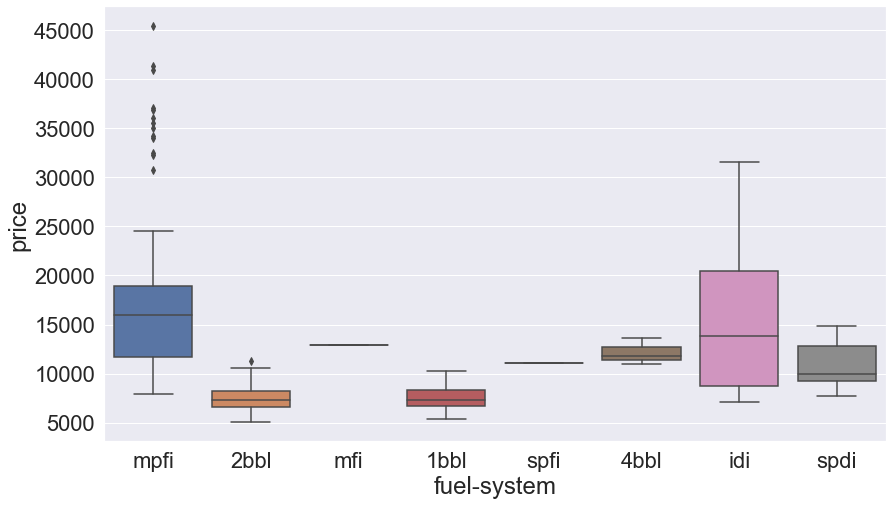

In [165]:
# Change seaborn plot size
fig = plt.gcf()
fig.set_size_inches(14, 8)

#Changing font-size
sns.set(font_scale=2)

#It shows fuel-system has higher range of quartile in idi
sns.boxplot(x=hd['fuel-system'],y=hd['price'])

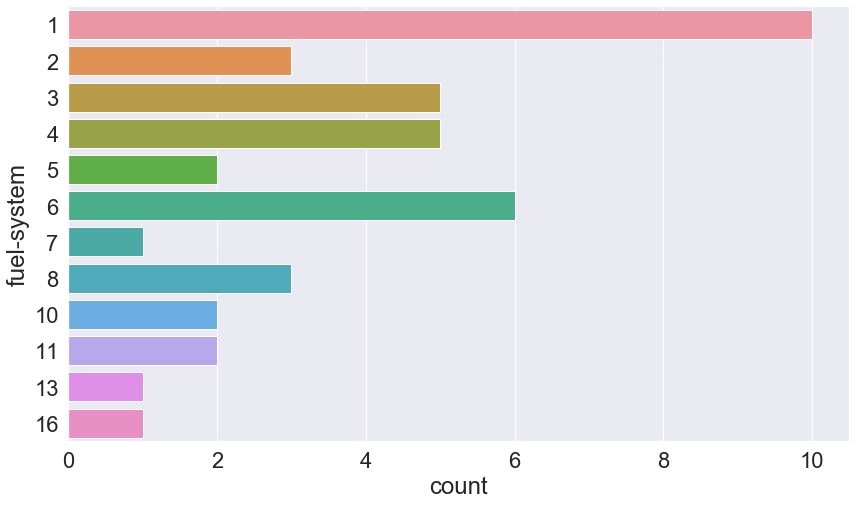

In [168]:
# Change seaborn plot size
fig = plt.gcf()
fig.set_size_inches(14, 8)

#Changing font-size
sns.set(font_scale=2)

#Checking which company sells out most of and which kind of fuel-system
sns.countplot(y=hd.groupby(['make','fuel-system'])['fuel-system'].count())

#### bore

In [172]:
hd['bore'].unique()

array([3.47, 2.68, 3.19, 3.13, 3.5 , 3.31, 3.62, 2.91, 3.03, 2.97, 3.34,
       3.6 , 2.92, 3.15, 3.43, 3.63, 3.54, 3.08,  nan, 3.39, 3.76, 3.58,
       3.46, 3.8 , 3.78, 3.17, 3.35, 3.59, 2.99, 3.33, 3.7 , 3.61, 3.94,
       3.74, 2.54, 3.05, 3.27, 3.24, 3.01])

In [173]:
#as value ranges in 3 to 4 so it's better to replace value with mean
hd['bore'].isna().sum()

4

In [174]:
#Shifting it's side to float64
hd['bore'].fillna(hd['bore'].mean(),inplace=True)
hd['bore'] = hd['bore'].astype('float64')

In [175]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199 entries, 0 to 204
Data columns (total 25 columns):
symboling            199 non-null int64
make                 199 non-null object
fuel-type            199 non-null object
aspiration           199 non-null object
num-of-doors         199 non-null int64
body-style           199 non-null object
drive-wheels         199 non-null object
engine-location      199 non-null object
wheel-base           199 non-null float64
length               199 non-null float64
width                199 non-null float64
height               199 non-null float64
curb-weight          199 non-null int64
engine-type          199 non-null object
num-of-cylinders     199 non-null object
engine-size          199 non-null int64
fuel-system          199 non-null object
bore                 199 non-null float64
stroke               195 non-null float64
compression-ratio    199 non-null float64
horsepower           197 non-null float64
peak-rpm             197 non-n

#### stroke

In [176]:
hd['stroke'].unique()

array([2.68, 3.47, 3.4 , 2.8 , 3.19, 3.39, 3.03, 3.11, 3.23, 3.46, 3.9 ,
       3.41, 3.07, 3.58, 4.17, 2.76, 3.15,  nan, 3.16, 3.64, 3.1 , 3.35,
       3.12, 3.86, 3.29, 3.27, 3.52, 2.19, 3.21, 2.9 , 2.07, 2.36, 2.64,
       3.08, 3.5 , 3.54, 2.87])

In [177]:
#checking count of null value
hd['stroke'].isna().sum()

4

In [178]:
#Replacing stroke with mean as it has range in 2.5 to 3.5
hd['stroke'].fillna(hd['stroke'].mean(),inplace=True)

In [181]:
# Change seaborn plot size
fig = plt.gcf()
fig.set_size_inches(16, 8)

#Changing font-size
sns.set(font_scale=2)

#Checking which company sells out most of and which kind of cylinder
hd.groupby(['make','bore','stroke'])['bore'].count()

make         bore  stroke
alfa-romero  2.68  3.47      1
             3.47  2.68      2
audi         3.13  3.40      1
             3.19  3.40      5
bmw          3.31  3.19      3
                            ..
volkswagen   3.19  3.40      8
volvo        3.01  3.40      1
             3.58  2.87      1
             3.62  3.15      2
             3.78  3.15      7
Name: bore, Length: 68, dtype: int64

<Figure size 1152x576 with 0 Axes>

#### compression-ratio

In [182]:
hd['compression-ratio'].unique()

array([ 9.  , 10.  ,  8.  ,  8.5 ,  8.3 ,  8.8 ,  9.5 ,  9.6 ,  9.41,
        9.4 ,  7.6 ,  7.  ,  9.2 , 10.1 ,  9.1 ,  8.1 , 11.5 ,  8.6 ,
       22.  , 21.5 ,  7.5 , 21.9 ,  7.8 ,  8.4 , 21.  ,  8.7 ,  9.31,
        9.3 ,  7.7 , 22.5 , 23.  ])

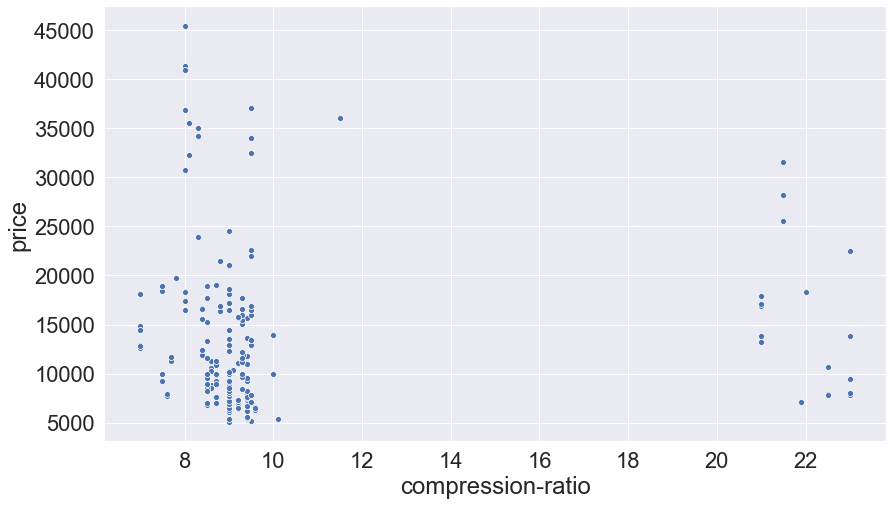

In [186]:
# Change seaborn plot size
fig = plt.gcf()
fig.set_size_inches(14, 8)

#Changing font-size
sns.set(font_scale=2)

#has it's range in order of 8-10 then 22+
sns.scatterplot(x=hd['compression-ratio'],y=hd['price'])

In [190]:
# Change seaborn plot size
fig = plt.gcf()
fig.set_size_inches(14, 8)

#Changing font-size
sns.set(font_scale=2)

#Checking which company sells out most of and which kind of fuel-system
hd.groupby(['make','compression-ratio'])['compression-ratio'].count()

make         compression-ratio
alfa-romero  9.0                  3
audi         8.0                  1
             8.3                  1
             8.5                  3
             10.0                 1
                                 ..
volvo        7.5                  2
             8.7                  1
             8.8                  1
             9.5                  6
             23.0                 1
Name: compression-ratio, Length: 74, dtype: int64

<Figure size 1008x576 with 0 Axes>

In [191]:
# Change seaborn plot size
fig = plt.gcf()
fig.set_size_inches(14, 8)

#Changing font-size
sns.set(font_scale=2)

#having count with engine-type
hd.groupby(['engine-type','fuel-system'])['fuel-system'].count()

engine-type  fuel-system
dohc         mpfi           12
l            2bbl            1
             idi             5
             mpfi            6
ohc          1bbl           11
             2bbl           55
             idi            14
             mfi             1
             mpfi           52
             spdi            9
             spfi            1
ohcf         2bbl            8
             mpfi            7
ohcv         mpfi           13
rotor        4bbl            3
             mpfi            1
Name: fuel-system, dtype: int64

<Figure size 1008x576 with 0 Axes>

#### horse-power

In [192]:
hd['horsepower'].unique()

array([111., 154., 102., 115., 110., 140., 101., 121., 182.,  48.,  70.,
        68.,  88., 145.,  58.,  76.,  60.,  86., 100.,  78.,  90., 176.,
       262., 135.,  84., 120.,  72., 123., 155., 184., 175., 116.,  69.,
        55.,  97., 152., 160., 200.,  95., 142., 143., 207.,  nan,  73.,
        82.,  94.,  62.,  56., 112.,  92., 161., 156.,  52.,  85., 114.,
       162., 134., 106.])

In [193]:
hd['horsepower'].isna().sum()#Count of null values

2

In [196]:
#Replacing value with mode coz there is no such thing as mean in horsepower
t=sd.mode(hd['horsepower'])
hd['horsepower'].fillna(t,inplace=True)

In [197]:
hd['horsepower'].isna().sum()

0

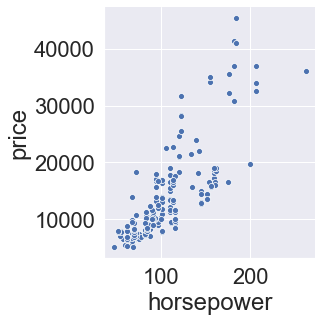

In [198]:
sns.relplot(x='horsepower',y='price',data=hd)

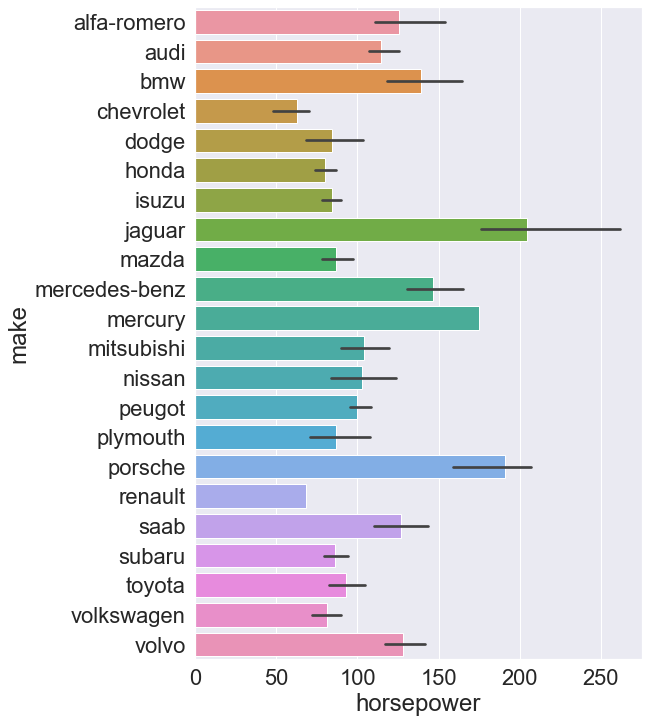

In [210]:
# Change seaborn plot size
fig = plt.gcf()
fig.set_size_inches(8, 12)

#Changing font-size
sns.set(font_scale=2)

#checking average for make and horsepower
sns.barplot(y=hd['make'],x=hd['horsepower'])

#### peak-rpm

In [202]:
hd['peak-rpm'].unique()

array([5000., 5500., 5800., 4250., 5400., 5100., 4800., 6000., 4750.,
       4200., 4350., 4500., 5200., 4150., 5600., 5900.,   nan, 5250.,
       4900., 4400., 6600., 5300.])

In [203]:
hd['peak-rpm'].isna().sum()#Taking up for removing null value

2

In [205]:
hd['peak-rpm'].fillna(hd['peak-rpm'].mean(),inplace=True)#Filling up with mean to remove null value

<Figure size 1008x576 with 0 Axes>

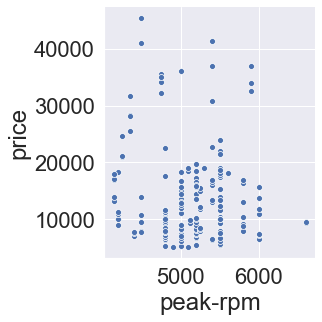

In [207]:
# Change seaborn plot size
fig = plt.gcf()
fig.set_size_inches(14, 8)

#Changing font-size
sns.set(font_scale=2)

sns.relplot(x='peak-rpm',y='price',data=hd)#Shows up most preffered range if 4.7k to 5.5k

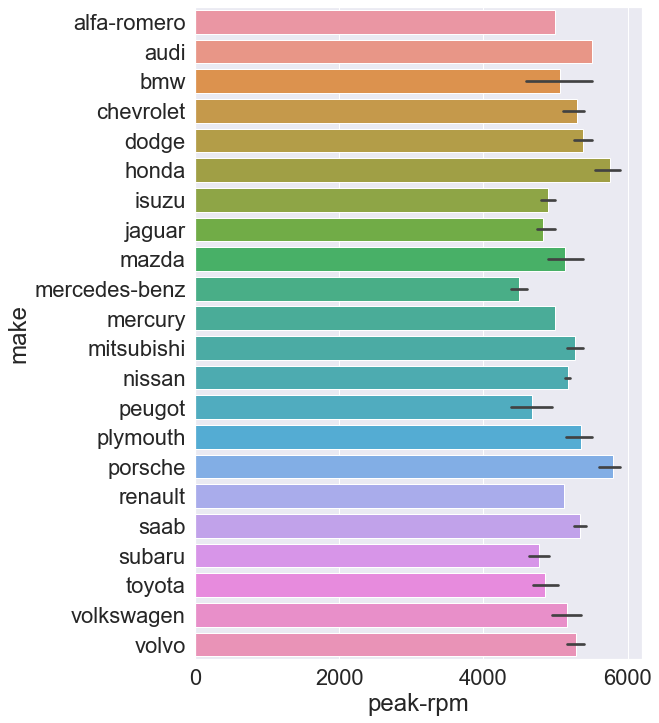

In [211]:
# Change seaborn plot size
fig = plt.gcf()
fig.set_size_inches(8, 12)

#Changing font-size
sns.set(font_scale=2)

#checking up between make and peak-rpm
sns.barplot(y=hd['make'],x=hd['peak-rpm'])

#### city-mpg

In [212]:
hd['city-mpg'].unique()

array([21, 19, 24, 18, 17, 23, 20, 16, 15, 47, 38, 37, 31, 49, 30, 27, 25,
       13, 26, 22, 14, 45, 28, 32, 35, 34, 29, 33], dtype=int64)

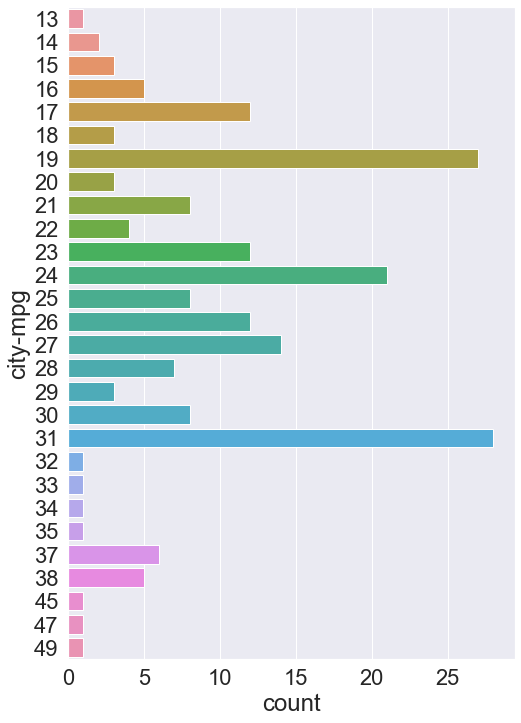

In [213]:
# Change seaborn plot size
fig = plt.gcf()
fig.set_size_inches(8, 12)

#Changing font-size
sns.set(font_scale=2)

#countplot for city-mpg for overview
sns.countplot(y=hd['city-mpg'])

<Figure size 576x864 with 0 Axes>

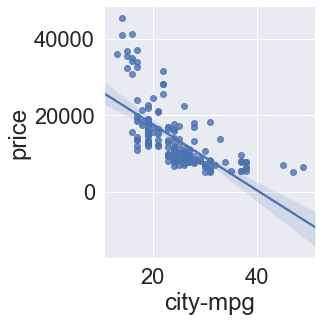

In [214]:
# Change seaborn plot size
fig = plt.gcf()
fig.set_size_inches(8, 12)

#Changing font-size
sns.set(font_scale=2)

#as most range of 31 price is less and is inversely proportional
sns.lmplot(x='city-mpg',y='price',data=hd)

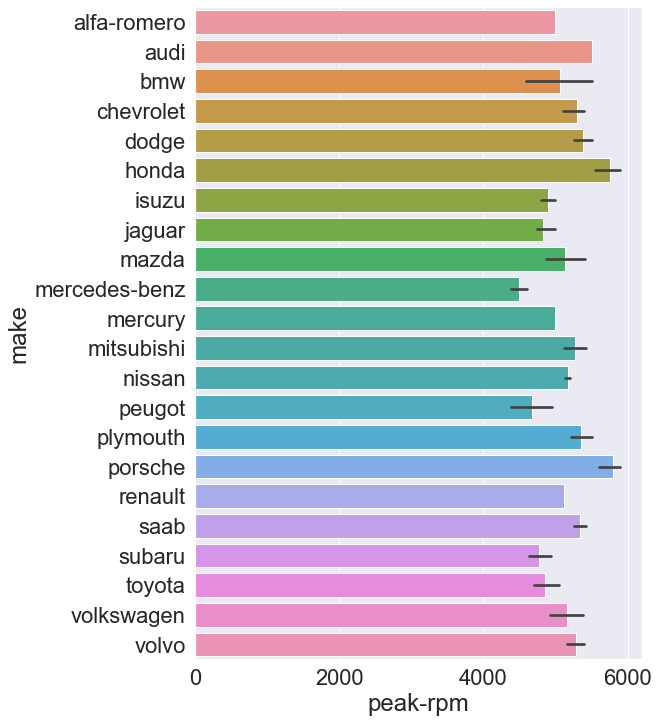

In [217]:
# Change seaborn plot size
fig = plt.gcf()
fig.set_size_inches(8, 12)

#Changing font-size
sns.set(font_scale=2)

#checking up between make and peak-rpm
sns.barplot(x=hd['peak-rpm'],y=hd['make'])

#### highway-mpg

In [218]:
hd['highway-mpg'].unique()

array([27, 26, 30, 22, 25, 20, 29, 28, 53, 43, 41, 38, 24, 54, 42, 34, 33,
       31, 19, 17, 23, 32, 39, 18, 16, 37, 50, 36, 47, 46], dtype=int64)

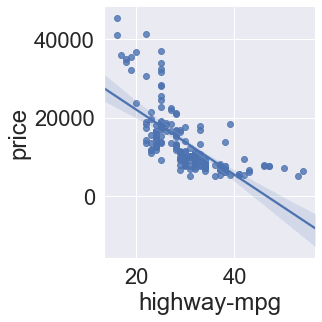

In [219]:
#gives relplot as defines a relation
sns.lmplot(x='highway-mpg',y='price',data=hd)

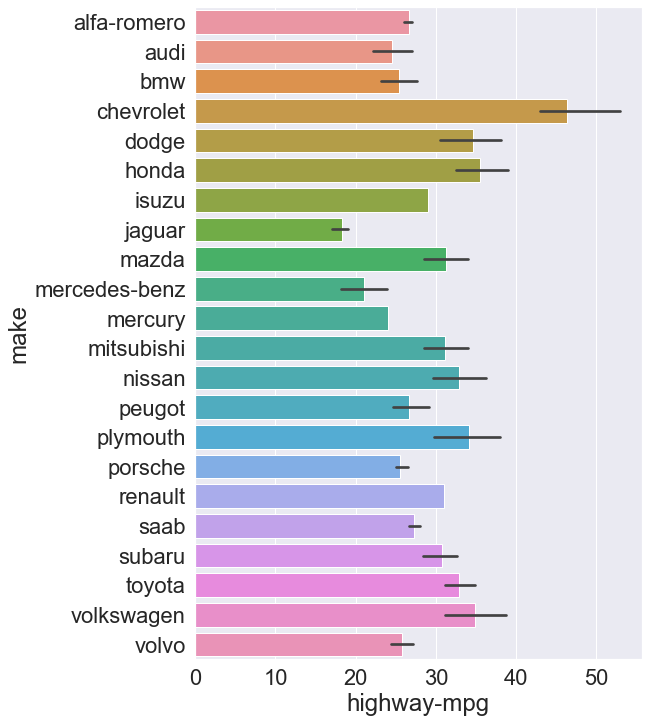

In [220]:
# Change seaborn plot size
fig = plt.gcf()
fig.set_size_inches(8, 12)

#Changing font-size
sns.set(font_scale=2)

#checking up between make and highway-mpg
sns.barplot(x=hd['highway-mpg'],y=hd['make'])

In [221]:
hd.corr()

,symboling,num-of-doors,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,-0.673295,-0.537043,-0.365804,-0.241760,-0.550618,-0.234008,-0.110812,-0.138915,-0.006999,-0.176034,0.071053,0.277366,-0.029998,0.042223,-0.083237
num-of-doors,-0.673295,1.000000,0.451401,0.403330,0.232216,0.545957,0.213634,0.027772,0.123829,-0.011403,0.163146,-0.097006,-0.233062,-0.034535,-0.053149,0.046532
wheel-base,-0.537043,0.451401,1.000000,0.876117,0.813947,0.589551,0.781575,0.570816,0.490898,0.160228,0.254714,0.375355,-0.358948,-0.475629,-0.548489,0.583842
length,-0.365804,0.403330,0.876117,1.000000,0.856437,0.487194,0.881686,0.684644,0.605835,0.126987,0.155624,0.579117,-0.281636,-0.677092,-0.709644,0.691207
width,-0.241760,0.232216,0.813947,0.856437,1.000000,0.300980,0.866516,0.729009,0.542193,0.191002,0.187534,0.614002,-0.242072,-0.643237,-0.690176,0.751628
height,-0.550618,0.545957,0.589551,0.487194,0.300980,1.000000,0.305865,0.071078,0.173632,-0.059809,0.252438,-0.080193,-0.304153,-0.057659,-0.112714,0.133639
curb-weight,-0.234008,0.213634,0.781575,0.881686,0.866516,0.305865,1.000000,0.848701,0.643273,0.169784,0.162061,0.757152,-0.279098,-0.754809,-0.800067,0.834059
engine-size,-0.110812,0.027772,0.570816,0.684644,0.729009,0.071078,0.848701,1.000000,0.571196,0.208093,0.029348,0.820387,-0.255892,-0.655723,-0.684537,0.872152
bore,-0.138915,0.123829,0.490898,0.605835,0.542193,0.173632,0.643273,0.571196,1.000000,-0.053699,-0.005936,0.564159,-0.263516,-0.591305,-0.599997,0.542560
stroke,-0.006999,-0.011403,0.160228,0.126987,0.191002,-0.059809,0.169784,0.208093,-0.053699,1.000000,0.187602,0.080742,-0.063794,-0.037463,-0.038262,0.084327


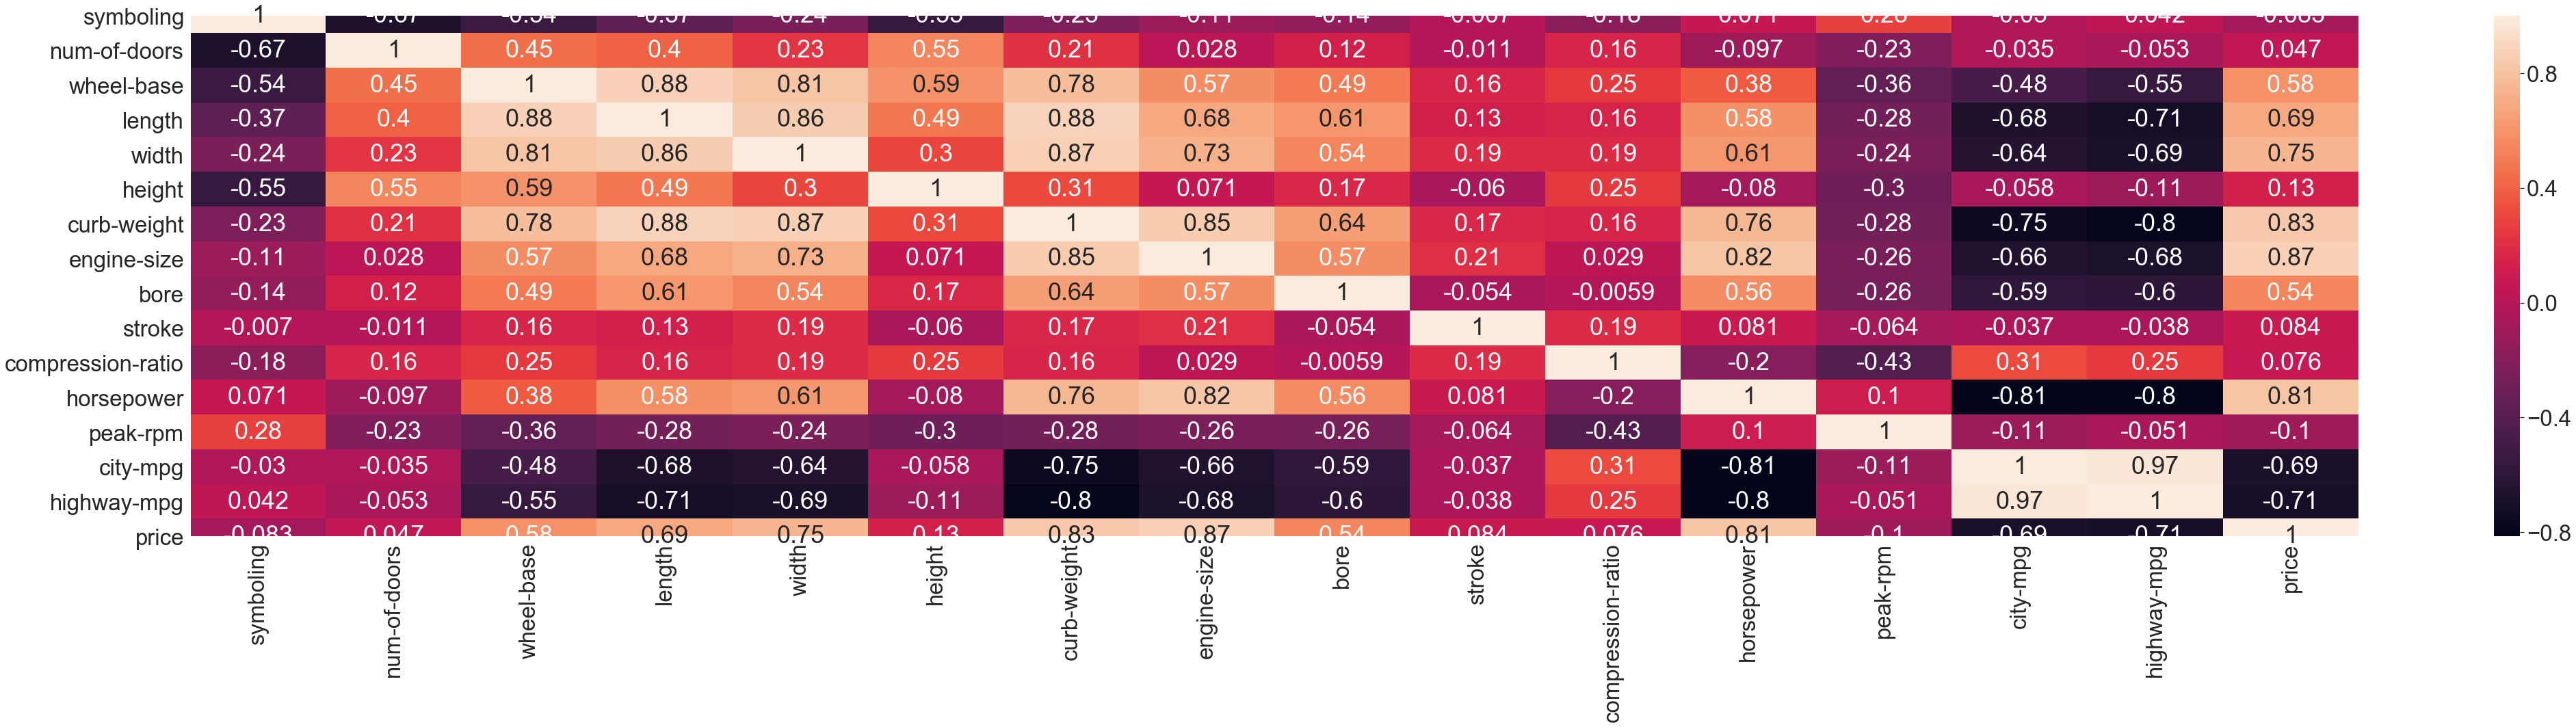

In [225]:
# Change seaborn plot size
fig = plt.gcf()

#Changing font-size
sns.set(font_scale=3)

sns.heatmap(hd.corr(),annot=True)

In [226]:
hd.describe()

,symboling,num-of-doors,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,0.844221,3.135678,98.822613,174.267839,65.896482,53.773869,2558.065327,127.045226,3.331949,3.255538,10.114171,103.246231,5118.020305,25.130653,30.633166,13242.613065
std,1.259651,0.993252,6.086103,12.323033,2.106373,2.446730,519.189151,41.703898,0.268538,0.317355,3.920762,37.617488,478.600274,6.408881,6.801746,7978.344857
min,-2.000000,2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,2.000000,94.500000,166.800000,64.150000,52.000000,2157.000000,97.500000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,4.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5118.020305,24.000000,30.000000,10295.000000
75%,2.000000,4.000000,102.400000,183.500000,66.750000,55.550000,2930.500000,143.000000,3.585000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16501.500000
max,3.000000,4.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


#### After seeing the above analysis and heatmap I will include the features wheel-base,length,width,curb-weight,engine-size,horsepower,city-mpg,highway-mpg,make,fuel-type,aspiration,body-style,drive-wheels

In [227]:
df = hd.copy()
#Copying in other as excluding some datasets

In [249]:
le = LabelEncoder()
df['make']=le.fit_transform(df['make'])
df['fuel-type']=le.fit_transform(df['fuel-type'])
df['fuel-system']=le.fit_transform(df['fuel-system'])
df['aspiration']=le.fit_transform(df['aspiration'])
df['body-style']=le.fit_transform(df['body-style'])
df['drive-wheels']=le.fit_transform(df['drive-wheels'])
df['engine-location']=le.fit_transform(df['engine-location'])
df['engine-type']=le.fit_transform(df['engine-type'])
df['num-of-cylinders']=le.fit_transform(df['num-of-cylinders'])
df['peak-rpm']=le.fit_transform(df['peak-rpm'])
df.head()

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,0,1,0,0,0,2,0,88.6,168.8,...,130,5,3.47,2.68,13,111.0,9,21,27,13495.0
1,3,0,1,0,0,0,2,0,88.6,168.8,...,130,5,3.47,2.68,13,111.0,9,21,27,16500.0
2,1,0,1,0,0,2,2,0,94.5,171.2,...,152,5,2.68,3.47,13,154.0,9,19,26,16500.0
3,2,1,1,0,1,3,1,0,99.8,176.6,...,109,5,3.19,3.40,22,102.0,16,24,30,13950.0
4,2,1,1,0,1,3,0,0,99.4,176.6,...,136,5,3.19,3.40,5,115.0,16,18,22,17450.0


In [250]:
X = df.iloc[:,:-1]
X.head()

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,3,0,1,0,0,0,2,0,88.6,168.8,...,2,130,5,3.47,2.68,13,111.0,9,21,27
1,3,0,1,0,0,0,2,0,88.6,168.8,...,2,130,5,3.47,2.68,13,111.0,9,21,27
2,1,0,1,0,0,2,2,0,94.5,171.2,...,3,152,5,2.68,3.47,13,154.0,9,19,26
3,2,1,1,0,1,3,1,0,99.8,176.6,...,2,109,5,3.19,3.40,22,102.0,16,24,30
4,2,1,1,0,1,3,0,0,99.4,176.6,...,1,136,5,3.19,3.40,5,115.0,16,18,22


In [251]:
y = df['price']
y.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

In [252]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,shuffle=True)

In [253]:
X_train.shape

(119, 24)

In [254]:
X_test.shape

(80, 24)

In [255]:
y_train.shape

(119,)

In [256]:
y_test.shape

(80,)

In [257]:
re = RandomForestRegressor()
re.fit(X_train,y_train)
pred = re.predict(X_test)

In [258]:
re.score(X_train,y_train)

0.9822243531708068

In [259]:
re.score(X_test,y_test)

0.9126915668359186

In [101]:
r2_score(pred,y_test)

0.8413132697952401